## Initial Data Preprocess

The function in this file divides the original 3D MRI NII data into a specified number of 2D slices according to the three axes for subsequent processing.


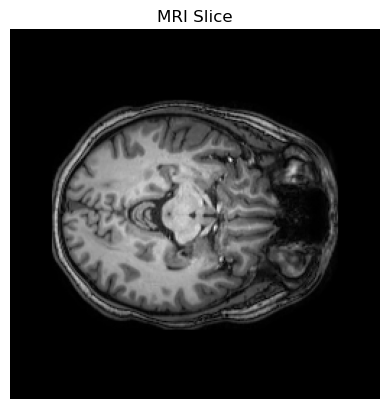

In [3]:
import nibabel as nib
import matplotlib.pyplot as plt

file_path = '../Aims-Tbi/scan_0007_T1.nii'
img = nib.load(file_path)

data = img.get_fdata()

slice_index = data.shape[2] // 2
slice_data = data[:, :, slice_index]

plt.imshow(slice_data, cmap='gray')
plt.title('MRI Slice')
plt.axis('off')
plt.show()


In [18]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os

def save_slices(data, axis, slices, output_folder):
    indices = np.linspace(0, data.shape[axis] - 1, slices, dtype=int)
    for i, idx in enumerate(indices):
        if axis == 0:
            slice_data = data[idx, :, :]
        elif axis == 1:
            slice_data = data[:, idx, :]
        else:
            slice_data = data[:, :, idx]
        plt.imshow(slice_data.T, cmap='gray', origin='lower', interpolation='none')
        plt.axis('off')
        plt.savefig(os.path.join(output_folder, f'slice_{axis}_{i}.png'), bbox_inches='tight', pad_inches=0)
        plt.close()

file_path = 'Aims-Tbi/scan_1127_Lesion.nii'
output_folder = 'output-tmp'
img = nib.load(file_path)
data = img.get_fdata()

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for axis in range(3):
    save_slices(data, axis, 32, output_folder)

print("All clips saved。")


所有切片已保存完成。


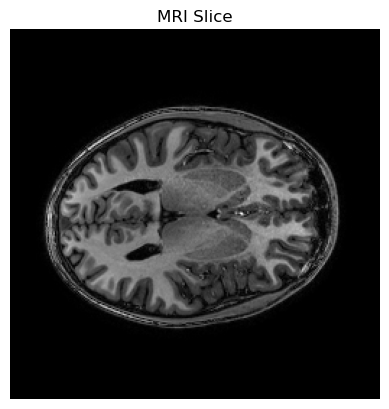

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import nibabel as nib  # 确保导入了nibabel

def get_mri_slice(data, axis, slice_index, num_slices):
    max_index = data.shape[axis] - 1
    index = int(np.round(max_index * slice_index / num_slices))
    
    # 获取切片数据
    if axis == 0:
        slice_data = data[index, :, :]
    elif axis == 1:
        slice_data = data[:, index, :]
    elif axis == 2:
        slice_data = data[:, :, index]

    return slice_data

img = nib.load("Aims-Tbi/scan_0519_T1.nii")
data = img.get_fdata()

axis = 2
slice_index = 5 
num_slices = 10

slice_img = get_mri_slice(data, axis, slice_index, num_slices)

plt.imshow(slice_img, cmap='gray')
plt.title('MRI Slice')
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import nibabel as nib
import os
from PIL import Image

def save_slices(data, axis, slices, output_folder):
    indices = np.linspace(0, data.shape[axis] - 1, slices, dtype=int)
    for i, idx in enumerate(indices):
        if axis == 0:
            slice_data = data[idx, :, :]
        elif axis == 1:
            slice_data = data[:, idx, :]
        else:
            slice_data = data[:, :, idx]
        
        if np.min(slice_data) == np.max(slice_data):
            normalized_slice_data = np.zeros(slice_data.shape, dtype=np.uint8)
        else:
            normalized_slice_data = (slice_data - np.min(slice_data)) / (np.max(slice_data) - np.min(slice_data)) * 255
            normalized_slice_data = normalized_slice_data.astype(np.uint8)
        
        img = Image.fromarray(normalized_slice_data)
        img.save(os.path.join(output_folder, f'slice_{axis}_{i}.png'))

def process_nii_files(input_folder, output_base_folder):
    for file_name in os.listdir(input_folder):
        if file_name.endswith('.nii'):
            full_path = os.path.join(input_folder, file_name)
            output_folder = os.path.join(output_base_folder, file_name.replace('.nii', ''))
            if not os.path.exists(output_folder):
                os.makedirs(output_folder)
            img = nib.load(full_path)
            data = img.get_fdata()
            for axis in range(3):
                save_slices(data, axis, 256, output_folder)
            print(f"Processed and saved all clips from {file_name}。")

input_folder = 'Aims-Tbi'
output_base_folder = 'output'

process_nii_files(input_folder, output_base_folder)
